<a href="https://colab.research.google.com/github/eileendchen/ASR-Project/blob/main/ASR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount Google Drive ##
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## import libraries ##

# install meteostat to computer #
! pip install meteostat
! pip install scikit-plot
! pip install streamlit
import scikitplot as skplt
import meteostat
from meteostat import Point, Daily
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import csv
import sys
import streamlit as st
import requests 
import statsmodels.api as sm
from datetime import datetime
from operator import itemgetter 
from csv import writer
import seaborn as sns
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
from sklearn import linear_model
from scipy.special import expit


## change directory to my working directory ##


In [ ]:
# ## combine csv files ##
# ## done in jupyter notebook so the path is different ##

# # use dictionary for loop #
# yr = {} 

# for n in range(1987, 2021):
#     yr[n] = pd.read_csv(r"C:\Eileen\LGHS 2020-2021\Lightning data\lightning_{}.csv".format(n))
#     # returns yr[n] for each year separately #
    
# # makes list of data frames #
# years = [yr[1987], yr[1988], yr[1989], yr[1990], yr[1991], yr[1992], yr[1993], yr[1994], yr[1995], 
#          yr[1996], yr[1997], yr[1998], yr[1999], yr[2000], yr[2001], yr[2002], yr[2003], yr[2004],
#          yr[2005], yr[2006], yr[2007], yr[2008], yr[2009], yr[2010], yr[2011], yr[2012], yr[2013], 
#          yr[2014], yr[2015], yr[2016], yr[2017], yr[2018], yr[2019], yr[2020]]


# # concat into one list #
# result = pd.concat(years)


# # export list into csv #
# result.to_csv (r"C:\Eileen\LGHS 2020-2021\Lightning data\allLightningFiles.csv", index=False, header=True )


In [ ]:
# Change tuples into strings #
# read file and provide path #
row = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ASR2021/Data/allLightningFiles.csv', index_col=False )

# run for loop #

for i in range(0,15):
  # only read certain row number, will change to n later #
    short = row.iloc[i] 

  # pull out specific column and convert to string #
   
    pt = short.center_point_geom
    date = short.date
    strikes = short.number_of_strikes
          
  # format variable #
  # may have to change the formatting in the future #
    pt = pt.replace(')','')                  # take out back parenthesis #
    pt = pt.replace('POINT(', '')            # take out "POINT(" #
    pt = pt.replace(' ',',')                 # take out spaces # 
    pt = pt.replace("'", "")              # take out the apostrophes # 
    
    pt = str(pt)
    pt = pt.split(',')                       # split into latitude and longitude #
    long = pt[0]                              # assign latitude variablem #
    lat = pt[1]                             # assign longitude variable #
    long = long.replace("'","")                # take out apostrophe #
    lat = lat.replace("'","")              # take out apostrophe #
    ptnew = [lat, long]   
    ptnew = (str(ptnew))
    ptnew = ptnew.replace("'","")
    ptnew = ptnew.replace('[','')
    ptnew = ptnew.replace(']','')
    lat = int(float(lat))                  # convert to integer #
    long = int(float(long))                    # convert to integer #

    datestr = str(date)
    
    # get individual variable dates #
    date = date.split('/')                   # split date into days, months, and year #
    year = date[2]                           # assign year variable #
    year = int(float(year))                  # convert to integer #
    day = date[1]                            # assign day variable #
    day = int(float(day))                    # convert to integer #
    month = date[0]                          # assign month variable #
    month = int(float(month))                # convert to integer #   

    #test = data.at[0,'tmax']
    #if test > 0:
      #print ('yay') 

    try: 
        start = datetime(year, month, day)
        end = start

        # create location variable #
        location = Point(lat, long)
  
        data = Daily(location, start, end)
        data = data.fetch()


        # convert the weather info to csv file#
        data.to_csv('data.csv')
        read = pd.read_csv('data.csv')
   
        if read.empty:
          continue

        if not read.empty:
          n = n+1
          
          # to avoid int not callable error #

          str = 6
          del str
          # make average temperature variable #
          tavg = read['tavg']
          tavg = tavg.values.tolist()
          tavg = str(tavg)
          tavg = tavg.replace('[','')
          tavg = tavg.replace(']','')

          # make rain variable #
          prcp = read['prcp']
          prcp = str(prcp.values.tolist())
          prcp = prcp.replace('[','')
          prcp = prcp.replace(']','')

          # make snow variable #
          snow = read['snow']
          snow = str(snow.values.tolist())
          snow = snow.replace('[','')
          snow = snow.replace(']','')

          # make wind speed variable #
          wind = read['wspd']
          wind = str(wind.values.tolist())
          wind = wind.replace('[','')
          wind = wind.replace(']','')

          # make air pressure variable #
          pressure = read['pres']
          pressure = str(pressure.values.tolist())
          pressure = pressure.replace('[','')
          pressure = pressure.replace('[','')
  
          List = [datestr, ptnew, strikes, tavg, prcp, snow, wind,'1']
          print (List)

          #n = str(n)
          #datecol = 'A' + n
          #locationcol = 'B' + n
          #strikescol = 'C' + n 
          #tempcol = 'D' + n 
          #raincol = 'E' + n
          #snowcol = 'F' + n
          #pressurecol = 'G' + n 

          with open('allLightning.csv', 'a') as f_object: 
        
          # Pass this file object to csv.writer() 
          # and get a writer object 
            writer_object = writer(f_object) 
  
          # Pass the list as an argument into 
          # the writerow() 
            writer_object.writerow(List) 
  
         #Close the file object 
            f_object.close() 

    except IndexError:
      print ('index error')
      print (i)

    except TypeError:
      continue
   

In [ ]:
# for 0 values# 
# Change tuples into strings #
# read file and provide path #

for x in range(0,1):
  for year in range(1997,2021):
    for month in range(1,13):
      for day in range(1,29):
        for l in range(30, 50):
          for o in range(0,-70):
   
            try: 
              start = datetime(year, month, day)
              end = start

              # create location variable #
              location = Point(l, o)
        
              data = Daily(location, start, end)
              data = data.fetch()

              # convert the weather info to csv file#
              data.to_csv('data.csv')
              read = pd.read_csv('data.csv')
        
              if read.empty:
                continue

              if not read.empty:
                
                # to avoid int not callable error #

                str = 6
                del str
                # make average temperature variable #
                tavg = read['tavg']
                tavg = tavg.values.tolist()
                tavg = str(tavg)
                tavg = tavg.replace('[','')
                tavg = tavg.replace(']','')

                # make rain variable #
                prcp = read['prcp']
                prcp = str(prcp.values.tolist())
                prcp = prcp.replace('[','')
                prcp = prcp.replace(']','')

                # make wind speed variable #
                wind = read['wspd']
                wind = str(wind.values.tolist())
                wind = wind.replace('[','')
                wind = wind.replace(']','')

                l = str(l)
                o = str(o)

                loc = (l,o)
                loc = str(loc)
                loc = loc.replace("'","")
                loc = loc.replace('(','')
                loc = loc.replace(')','')
        
                List = [l, o, '0', tavg, prcp, wind,'0']
                print (List)
                if loc != 'nan':
                  if strikes != 'nan':
                    if tavg != 'nan':
                      if prcp != 'nan':
                        if wind != 'nan':
                          with open('/content/drive/MyDrive/ColabNotebooks/0values.csv', 'a') as f_object:
                            writer_object = writer(f_object)

                            writer_object.writerow(List)

                            f_object.close()

            except IndexError:
              print ('index error')
              print (year,month,day)

            except TypeError:
              continue
   

Accuracy: 0.9116684841875682
Precision: 0.9034627492130115
Recall: 0.924812030075188
[[ 0.18466565  0.10235202  0.27146294  0.0529553  -0.03139277]]


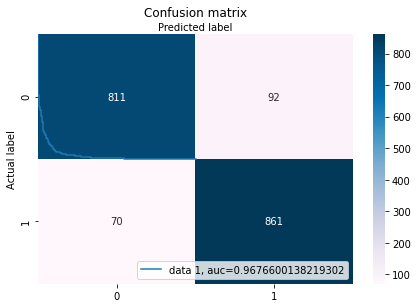

ValueError: ignored

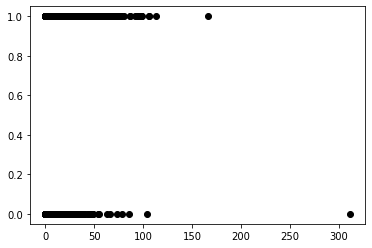

In [ ]:
# running logistic regression #
col_names = ['latitude', 'longitude', 'numstrikes', 'avgtemp', 'prcp', 'windspeed', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/allValues.csv", header=0, names=col_names)

feature_cols = ['latitude', 'longitude','avgtemp','prcp','windspeed']

X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=None)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')


# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(logreg.coef_)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

probs = logreg.predict_proba(X_test)
plot = skplt.metrics.plot_roc(y_test, probs)
plt.title("ROC Curves - MLPClassifier")


Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: iris-ml-app.py


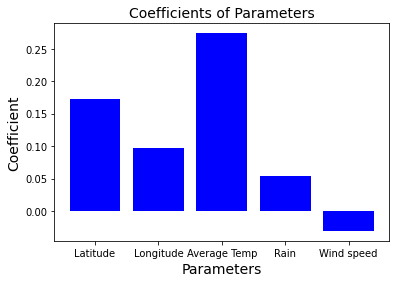

In [ ]:
   
Parameters = ['Latitude','Longitude','Average Temp','Rain','Wind speed']

Coefficients = [0.17304973, 0.09772443, 0.27377856, 0.05391653, -0.03062149]
                
New_Colors = ['blue']
plt.bar(Parameters, Coefficients, color=New_Colors)
plt.title('Coefficients of Parameters', fontsize=14)
plt.xlabel('Parameters', fontsize=14)
plt.ylabel('Coefficient', fontsize=14)
plt.grid(False)
plt.show()



[[2492  340]
 [ 431 2604]]
Accuracy: 0.8685870121015852
Precision: 0.8845108695652174
Recall: 0.857990115321252
[[0.78 0.22]
 [0.79 0.21]
 [0.   1.  ]
 ...
 [0.   1.  ]
 [0.91 0.09]
 [0.95 0.05]]


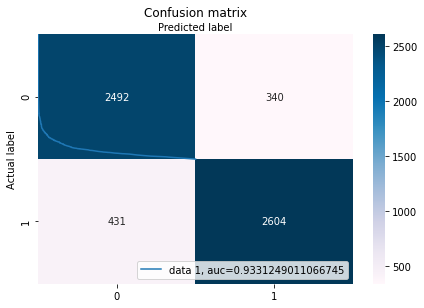

IndexError: ignored

In [ ]:
col_names = ['latitude', 'longitude','numstrikes', 'avgtemp', 'prcp', 'windspeed', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/allValues.csv", header=0, names=col_names)

feature_cols = ['latitude', 'longitude','windspeed']

X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.80,random_state=42)

tree = RandomForestClassifier()
branch = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print (cnf_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(tree.predict_proba(X_test))

y_pred_proba = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

weight = tree.feature_importances_
weight = list(weight)
zero = weight[0]
one = weight[1]
two = weight[2]
three = weight[3]
four = weight[4]

Parameters = ['Latitude','Longitude','Average Temp','Rain','Wind speed']

Coefficients = [zero, one, two, three, four]
                
New_Colors = ['blue']
plt.bar(Parameters, Coefficients, color=New_Colors)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)
plt.show()

probs = tree.predict_proba(X_test)
plot = skplt.metrics.plot_roc(y_test, probs)
plt.title("ROC Curves - MLPClassifier")


[[1590  172]
 [ 196 1709]]
Accuracy: 0.8996454867739296
Precision: 0.9085592769803296
Recall: 0.8971128608923884


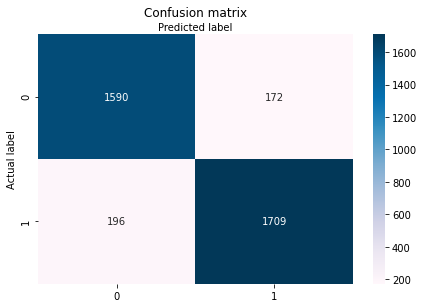

In [ ]:
col_names = ['latitude', 'longitude','numstrikes', 'avgtemp', 'prcp', 'windspeed', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/allValues.csv", header=0, names=col_names)

feature_cols = ['latitude', 'longitude','avgtemp','prcp','windspeed']

X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.50,random_state=0)

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print (cnf_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))




In [ ]:
col_names = ['latitude', 'longitude','numstrikes', 'avgtemp', 'prcp', 'windspeed', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/allValues.csv", header=0, names=col_names)

feature_cols = ['latitude', 'longitude','avgtemp','prcp','windspeed']

X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.75,random_state=42)

lm = linear_model.LinearRegression()
test = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print (y_pred)

accuracy = lm.score(X_test,y_test)
print(accuracy*100,'%')
r2 = metrics.explained_variance_score(y_test, y_pred)
print("R^2 value:", r2)

[0.52606722 0.89778126 0.59874641 ... 1.00155627 0.08362216 0.17170054]
61.96740063925825 %
R^2 value: 0.6197859117284026
